# Force Quaint

## Install dependencies

In [15]:
%%capture
%pip install -U langchain_core langgraph

## Import packages

In [1]:
import operator
from typing import Annotated, Any, Sequence
from typing_extensions import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END

In [2]:
from IPython.display import display, HTML, Image

## State class

In [3]:
class State(TypedDict):
    ticker: str
    messages: Annotated[list, operator.add]

### _dummy node_

In [4]:
def dummy_node(state: State) -> State:
    return {"messages": ["intermediate message"]}

### Build Agent Graph

In [19]:
builder = StateGraph(State)
builder.add_node("Lookup Ticker",dummy_node)
builder.add_node("Validate SNP 500", dummy_node)
builder.add_node("Get Earnings Multiple", dummy_node)
builder.add_node("Calculate Current Premium", dummy_node)
builder.add_node("Evaluate Competitive Rivalry", dummy_node)
builder.add_node("Evaluate Threat of new Entrant", dummy_node)
builder.add_node("Evaluate Bargaining Power of Suppliers", dummy_node)
builder.add_node("Evaluate Bargaining Power of Buyers", dummy_node)
builder.add_node("Evaluate Threat of Substitutes", dummy_node)
builder.add_node("Estimate Target Premium", dummy_node)
builder.add_node("Calculate Target Return", dummy_node)
builder.add_edge(START, "Lookup Ticker")

def is_in_snp(ticker: str) -> bool:
    pass

def is_evaluation_valid(state: State) -> bool:
    pass

def is_in_snp(state: State) -> bool:
    pass
    
def validate_snp(state: State) -> Sequence[str]:
    if is_in_snp(state["ticker"]):
        return [
            "Get Earnings Multiple", 
            "Evaluate Competitive Rivalry", 
            "Evaluate Threat of new Entrant",
            "Evaluate Bargaining Power of Suppliers",
            "Evaluate Bargaining Power of Buyers",
            "Evaluate Threat of Substitutes"
        ]
    else:
        return [END]

builder.add_edge("Lookup Ticker", "Validate SNP 500")

builder.add_conditional_edges("Validate SNP 500", validate_snp, [
    "Get Earnings Multiple", 
    "Evaluate Competitive Rivalry", 
    "Evaluate Threat of new Entrant",
    "Evaluate Bargaining Power of Suppliers",
    "Evaluate Bargaining Power of Buyers",
    "Evaluate Threat of Substitutes",
    END
])

builder.add_edge("Get Earnings Multiple", "Calculate Current Premium")

for node in [
    "Evaluate Competitive Rivalry", 
    "Evaluate Threat of new Entrant",
    "Evaluate Bargaining Power of Suppliers",
    "Evaluate Bargaining Power of Buyers",
    "Evaluate Threat of Substitutes"
]:
    builder.add_conditional_edges(node, is_evaluation_valid, {True: "Estimate Target Premium", False: node})

builder.add_edge("Estimate Target Premium", "Calculate Target Return")
builder.add_edge("Calculate Current Premium", "Calculate Target Return")
    

builder.add_edge("Calculate Target Return", END)
graph = builder.compile()

### Visualize Agent Graph

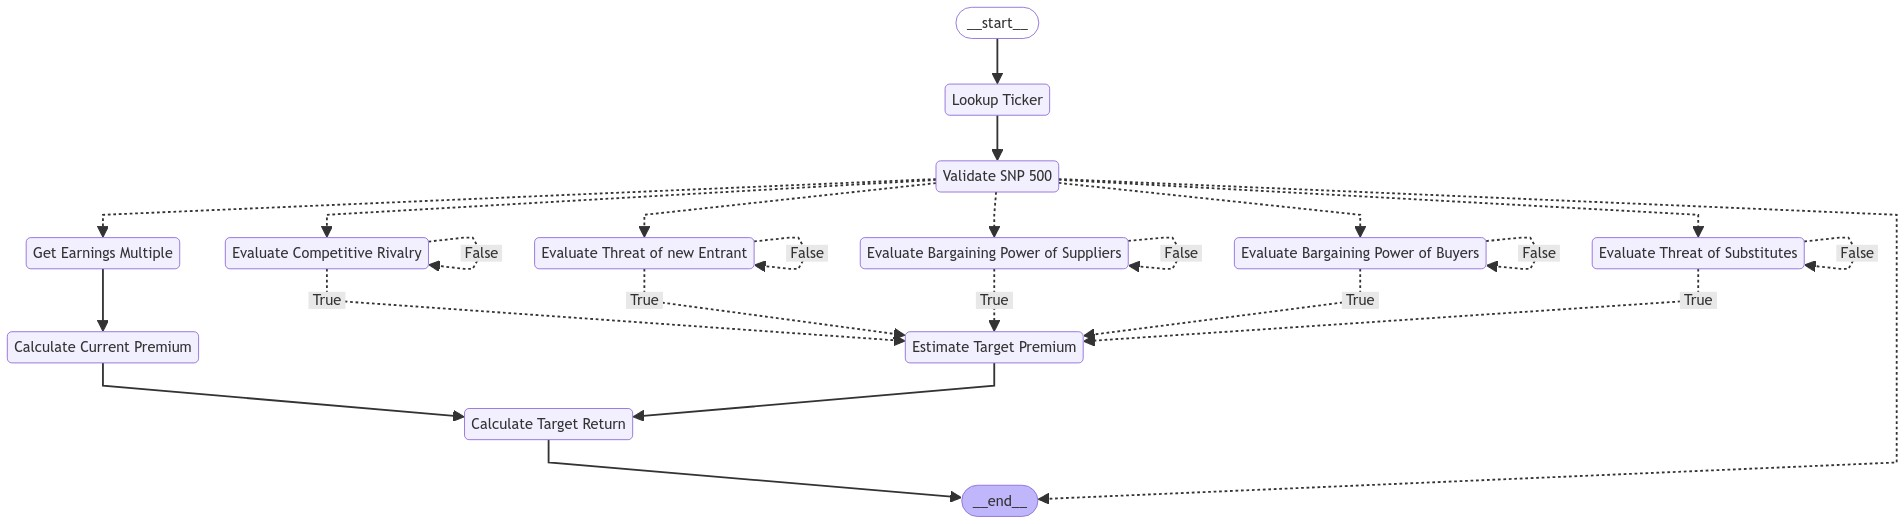

In [20]:
display(Image(graph.get_graph().draw_mermaid_png()))